In [1]:
import pandas as pd

In [2]:
Casualties = pd.read_csv('fatalities_isr_pse_conflict_2000_to_2023.csv')

In [3]:
Casualties['age']

0        32.0
1        21.0
2        16.0
3        19.0
4        15.0
         ... 
11119    64.0
11120    28.0
11121    36.0
11122    21.0
11123    24.0
Name: age, Length: 11124, dtype: float64

In [4]:
Casualties

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


In [5]:
Casualties.rename(columns = {'date_of_event': 'date_event',
                             'took_part_in_the_hostilities': 'hostile',
                             'event_location': 'loc',
                             'event_location_district': 'loc_district',
                             'event_location_region': 'loc_region'}, inplace = True)

In [6]:
pd.set_option('display.max_columns', None)
Casualties.head(0)

,name,date_event,age,citizenship,loc,loc_district,loc_region,date_of_death,gender,hostile,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes


In [7]:
Casualties['date_event'] = pd.to_datetime(Casualties['date_event'])

In [8]:
Casualty_ratio = Casualties[(Casualties['citizenship'] == 'Palestinian') | (Casualties['citizenship'] == 'Israeli')]['citizenship'].value_counts()
Casualty_ratio

citizenship
Palestinian    10092
Israeli         1029
Name: count, dtype: int64

<Axes: title={'center': 'Casualty ratio'}, ylabel='count'>

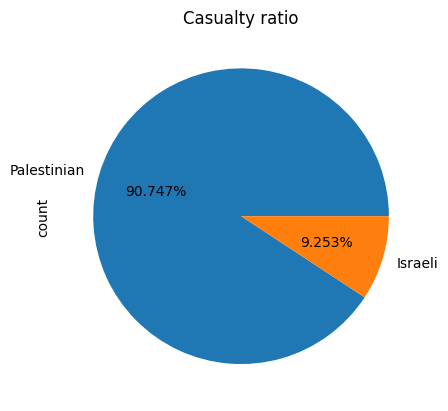

In [9]:
Casualty_ratio.plot(kind = 'pie', title = 'Casualty ratio', autopct = '%.3f%%')

<Axes: title={'center': 'Deaths by hostility'}, ylabel='count'>

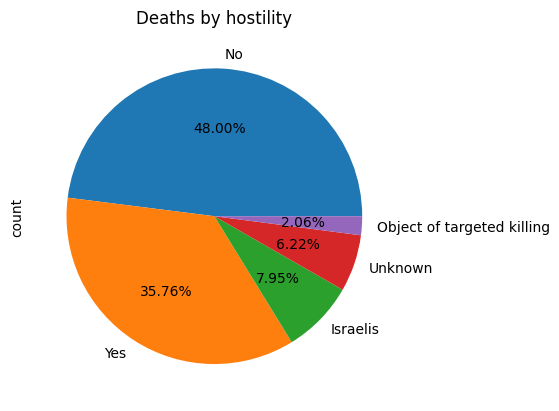

In [10]:
Casualties['hostile'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', title = 'Deaths by hostility')

In [28]:
x = Casualties.groupby(['ammunition','killed_by']).count()
x

name  date_event   age  \
ammunition                  killed_by                                         
0.22-caliber bullets        Israeli security forces    16          16    16   
Qassam rocket               Palestinian civilians      15          15    15   
bomb                        Israeli security forces   113         113   112   
                            Palestinian civilians     136         136   135   
car bomb                    Israeli security forces     2           2     2   
                            Palestinian civilians      13          13    13   
explosive belt              Palestinian civilians     326         326   325   
flare bomb                  Israeli security forces     1           1     1   
flechette shells            Israeli security forces    22          22    22   
grad rocket                 Palestinian civilians       7           7     7   
grenade                     Israeli security forces     1           1     1   
                            Palestinian civilians       1           1     1   
knife                       Israeli civilians           4           4     4   
                            Palestinian civilians      33          33    32   
live ammunition             Israeli civilians          44          44    44   
                            Israeli security forces  1343        1343  1341   
                            Palestinian civilians     127         127   125   
missile                     Israeli security forces  2858        2858  2842   
                            Palestinian civilians      19          19    19   
mortar fire                 Israeli security forces    42          42    42   
                            Palestinian civilians       9           9     9   
phosphorus shell            Israeli security forces    16          16    16   
rock                        Palestinian civilians       1           1     1   
rocket                      Palestinian civilians      12          12    12   
rubber-coated metal bullets Israeli security forces    19          19    19   
shell                       Israeli security forces   675         675   667   
sponge rounds               Israeli security forces     2           2     2   
stun grenade                Israeli security forces     1           1     1   
teargas canister            Israeli security forces    13          13    13   

                                                     citizenship   loc  \
ammunition                  killed_by                                    
0.22-caliber bullets        Israeli security forces           16    16   
Qassam rocket               Palestinian civilians             15    15   
bomb                        Israeli security forces          113   113   
                            Palestinian civilians            136   136   
car bomb                    Israeli security forces            2     2   
                            Palestinian civilians             13    13   
explosive belt              Palestinian civilians            326   326   
flare bomb                  Israeli security forces            1     1   
flechette shells            Israeli security forces           22    22   
grad rocket                 Palestinian civilians              7     7   
grenade                     Israeli security forces            1     1   
                            Palestinian civilians              1     1   
knife                       Israeli civilians                  4     4   
                            Palestinian civilians             33    33   
live ammunition             Israeli civilians                 44    44   
                            Israeli security forces         1343  1343   
                            Palestinian civilians            127   127   
missile                     Israeli security forces         2858  2858   
                            Palestinian civilians             19    19   
mortar fire                 Israeli security forc

In [31]:
pd.DataFrame (x['ammunition'],
              index = ['name', 'killed_by'])

KeyError: 'ammunition'

<Axes: xlabel='ammunition,killed_by'>

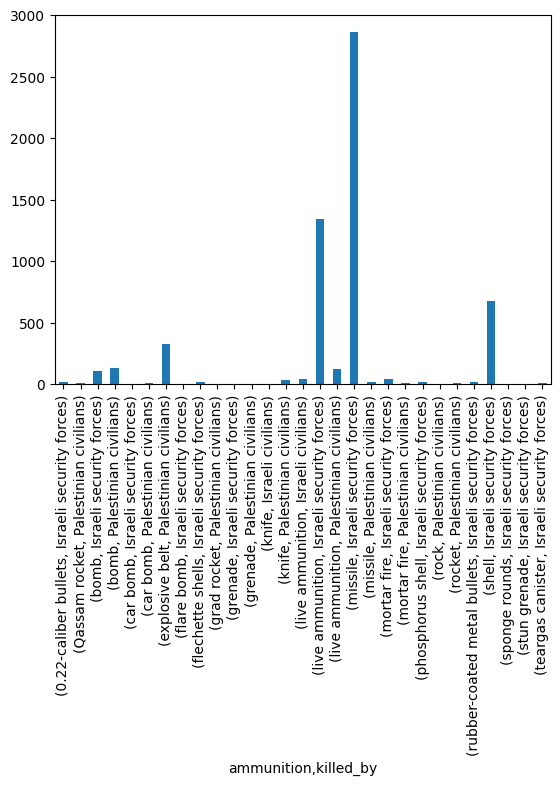

In [13]:
x.plot(kind = 'bar', x = 'killed', stacked = True)

In [14]:
Casualties.groupby('killed_by').value_counts()

killed_by              name                                  date_event  age   citizenship  loc                     loc_district  loc_region  date_of_death  gender  hostile   place_of_residence  place_of_residence_district  type_of_injury  ammunition       notes                                                                                                                                                  
Israeli civilians      Haydar Jadu' 'Abd al-Jabber Kan'an    2001-08-29  27.0  Palestinian  'Anata                  al-Quds       West Bank   2001-08-29     M       No        Hizma               al-Quds                      gunfire         live ammunition  Killed while riding in his car.                                                                                                                            1
                       Husam Hussein Muhammad a-Rawidi       2011-02-11  24.0  Palestinian  Jerusalem               Israel        Israel      2011-02-11     M       No        Ka